In [1]:
! python --version

Python 3.10.6


In [11]:
pixel_count = []

In [2]:
def generate_images(width: int, height: int) -> None:
    ## Max image size = 5000 x 5000
    import shutil, os
    import numpy
    from PIL import Image
    try:
        os.mkdir("scalable_images_simple")
    except:
        print("Removing existing directory contents")
        shutil.rmtree("scalable_images_simple")
        os.mkdir("scalable_images_simple")
    pixel_count = []
    
    numpy.random.seed(201)
    img_width = width
    img_height = height
    image_num = 0;
    while (img_width * img_height <= 5000**2):
        pixel_count.append(img_width * img_height)
        ## Uncomment these if you are actually making more images
        imarray = numpy.random.rand(img_height, img_width, 3) * 60 
        im = Image.fromarray(imarray.astype('uint8')).convert('RGBA')
        im.save(f"scalable_images_simple/img-no-{image_num}-{img_width}x{img_height}.png")
        if (img_width < img_height):
            img_width += 500
        else:
            img_height += 375
        image_num += 1
    print("pixel_counts = ", pixel_count)
# generate_images(500, 375)

In [47]:
pixel_counts =  [187500, 375000, 750000, 1125000, 1687500, 2250000, 2812500, 3750000, 4500000, 5625000, 6562500, 
                 7875000, 9000000, 10125000, 11812500, 13125000, 15000000, 16500000, 18562500, 20250000, 21937500, 24375000]

compressedTimes = {
    "quadtrees": [42,8,5,6,10,15,19,37,40,58,96,53,61, 68, 78, 88, 69, 102, 223, 174, 201, 216],
    "octree_+_uniform_quantised_huffman": [136, 151, 270, 440, 600, 1369, 1126, 1594, 1898, 2345, 2748, 3506, 4282, 4537, 9647, 8801, 7863, 12328, 11723, 14226, 13229, 14873],
    "kdtree_+_uniform_quantised_huffman": [614, 682, 1832, 2851, 4661, 6966, 8797, 8753, 10858, 14832, 20405, 22221, 22085, 26312, 33122, 39959, 43675, 53079, 52916, 65223, 67022, 81038],
    "huffman": [120, 122, 301, 291, 532, 927, 898, 1668, 2811, 2811, 3033, 3355, 4406, 5003, 10359, 11924, 6607, 20065, 16953, 19673, 19999, 17454],
    "uniformed_quantised_huffman": [126, 139, 188, 277, 471, 694, 729, 974, 1735, 1945, 2530, 3460, 3926, 3542, 6031, 7614, 7166, 8149, 10278, 11619, 11384, 14915],
    "adaptive_quantised_huffman": [131, 120, 281, 298, 567, 676, 765, 860, 1287, 1649, 2401, 2531, 2590, 2763, 5295, 6965, 9186, 9809, 9301, 12476, 12498, 22887],    
}
bytesSaved  = {
    "quadtrees": [654967, 1313331, 2603679, 3903291, 5824503, 7778803, 9720619, 12899132, 15514508, 19350750, 22567725, 27048637, 30920786, 34772821, 40533313, 45031671, 51424297, 56564544, 63599488, 69382091, 75173251, 83480873],
    "octree_+_uniform_quantised_huffman": [414350, 844583, 1642089, 2497866, 3727000, 5090341, 6224856, 8416274, 9894108, 12139753, 14155211, 17213494, 19680725, 22127273, 25852064, 28639610, 32690139, 36057955, 40529512, 44091935, 47774790, 52235389],
    "kdtree_+_uniform_quantised_huffman": [443725, 891152, 1759625, 2637362, 3925761, 5247249, 6556252, 8680078, 10451704, 13022321, 15184608, 18188958, 20795482, 23381892, 27243946, 30265742, 34548993, 38001740, 42716504, 46600670, 50493392, 56058827],
    "huffman": [85044, 181196, 347101, 522272, 756819, 1024459, 1279611, 1647012, 2013497, 2476418, 2882278, 3427594, 3926426, 4405124, 5105584, 5668377, 6438776, 7081229, 7931862, 8654442, 9385628, 10384363],
    "uniformed_quantised_huffman": [443668, 891095, 1759568, 2637305, 3925704, 5247192, 6556195, 8680021, 10451647, 13022264, 15184551, 18188901, 20795425, 23381835, 27243889, 30265685, 34548936, 38001683, 42716447, 46600613, 50493335, 56058770],
    "adaptive_quantised_huffman": [469191, 942026, 1861292, 2789769, 4154248, 5552074, 6936832, 9187848, 11060705, 13783465, 16072634, 19254994, 22013901, 24752069, 28842573, 32041968, 36578742, 40234869, 45228888, 49341707, 53461960, 59357265]
}
decompressTimes = {
    "quadtrees": [10, 13, 30, 29, 45, 62, 97, 117, 129, 244, 222, 212, 279, 313, 477, 328, 489, 445, 945, 691, 958, 1125],
    "octree_+_uniform_quantised_huffman": [20, 19, 45, 70, 116, 293, 282, 401, 524, 820, 702, 822, 1458, 1194, 1825, 2400, 2178, 3067, 3403, 2656, 2997, 2549],
    "kdtree_+_uniform_quantised_huffman": [24, 18, 113, 144, 392, 394, 498, 663, 710, 1104, 1298, 1581, 1829, 1677, 2485, 2806, 3957, 4286, 4060, 5388, 2893, 4016],
    "huffman": [28, 45, 109, 95, 173, 391, 408, 698, 673, 1006, 775, 688, 1146, 2480, 2795, 2081, 1736, 2544, 2289, 2685, 2521, 3416],
    "uniformed_quantised_huffman": [22, 17, 82, 138, 165, 222, 386, 540, 582, 776, 582, 627, 645, 1477, 1378, 2965, 2188, 2965, 3030, 3336, 3431, 4396],
    "adaptive_quantised_huffman": [20, 23, 114, 112, 185, 271, 375, 544, 602, 1023, 677, 523, 560, 824, 1858, 2236, 3028, 2328, 2726, 3520, 4202, 3586]
}
maeValues = {
    "quadtrees": [63.77640533333334, 63.79952177777778, 63.723686666666666, 63.75604474074074, 63.760400790123455, 63.75575792592593, 63.75989842962963, 63.74481342222222, 63.75437822222222, 63.76063324444444, 63.75181226666667, 63.75022725925926, 63.74864348148148, 63.75167344855967, 63.74677528042328, 63.743589180952384, 63.7543422, 63.7455077979798, 63.74274804938272, 63.758436312757205, 63.754109082621085, 63.7491683965812], 
    "octree_+_uniform_quantised_huffman": [10.99352, 10.941458666666668, 10.969126666666666, 10.945268444444444, 11.001132049382717, 10.904072444444445, 11.010245925925926, 11.010105155555555, 10.945002444444444, 10.978089125925926, 10.979069257142857, 10.94174328042328, 10.948103259259259, 10.944735374485596, 11.011729862433862, 10.946031034920635, 10.944372488888888, 11.006361535353536, 11.010682594837261, 10.945447094650206, 10.947734974358974, 10.97659612991453],
    "kdtree_+_uniform_quantised_huffman": [7.979633777777778, 7.9722684444444445, 7.9702866666666665, 7.972240296296296, 7.97144, 7.973885629629629, 7.972362785185185, 7.971877244444444, 7.971181185185185, 7.972500622222222, 7.973544126984127, 7.972493841269841, 7.971784814814815, 7.972933102880658, 7.974030024691358, 7.973012622222222, 7.9720922, 7.972411676767677, 7.9725282334455665, 7.972342897119342, 7.971943111111111, 7.97309842051282],
    "huffman": [0.0, 7.111111111111111e-06, 4.133333333333333e-05, 1.6888888888888888e-05, 2.2123456790123455e-05, 0.0, 0.0, 0.0, 5.703703703703704e-06, 0.0, 7.212698412698413e-06, 1.3968253968253969e-06, 0.0, 2.403292181069959e-06, 1.6649029982363315e-06, 0.0, 3.3333333333333335e-07, 3.797979797979798e-06, 3.0886644219977554e-06, 1.5967078189300412e-06, 2.339981006647673e-06, 1.258119658119658e-06],
    "uniformed_quantised_huffman": [7.979633777777778, 7.9722684444444445, 7.9702866666666665, 7.972240296296296, 7.97144, 7.973885629629629, 7.972362785185185, 7.971877244444444, 7.971181185185185, 7.972500622222222, 7.973544126984127, 7.972493841269841, 7.971784814814815, 7.972933102880658, 7.974030024691358, 7.973012622222222, 7.9720922, 7.972411676767677, 7.9725282334455665, 7.972342897119342, 7.971943111111111, 7.97309842051282],
    "adaptive_quantised_huffman": [11.464736, 11.460595555555555, 11.449872444444445, 11.460713777777778, 11.457224098765431, 11.461340740740741, 11.462078933333334, 11.459048444444445, 11.459842074074075, 11.460037096296297, 11.45648893968254, 11.458822560846562, 11.457004814814814, 11.457361283950616, 11.458527181657848, 11.4591392, 11.460669933333334, 11.459874626262627, 11.459807820426487, 11.459707144032922, 11.460329663817664, 11.458446112820512]
}
mseValues = {
    "quadtrees": [16265.055402666667, 16278.165792, 16247.82202, 16260.392461333333, 16259.949369481481, 16261.825214222223, 16261.9069984, 16254.437860533333, 16259.737988888888, 16260.59452231111, 16257.857618895237, 16257.164035428572, 16257.067841333333, 16257.144098271605, 16255.995061248677, 16253.120362666667, 16258.7698426, 16254.976413575758, 16255.205736404041, 16260.815092049383, 16258.984969299145, 16256.289223753845],
    "octree_+_uniform_quantised_huffman": [734.4545653333333, 727.3479706666667, 732.5705453333334, 728.2375226666667, 739.3878856296296, 720.0885035555556, 741.0279978666666, 740.7976370666667, 728.2026535555556, 734.4946965333334, 734.7241764571429, 727.4102355555556, 728.4862315555556, 728.0998041481481, 741.0382488888889, 728.0859151238095, 727.9115584, 740.2996762424242, 741.0129393670034, 728.0788843950618, 728.4666814358974, 734.2122683897436],
    "kdtree_+_uniform_quantised_huffman": [255.146784, 254.88270933333334, 254.77194266666666, 254.86772888888888, 254.79301748148148, 254.93706133333333, 254.84807573333333, 254.80940453333332, 254.794628, 254.85649493333332, 254.91979855238094, 254.8510314920635, 254.8207588888889, 254.88018854320987, 254.93593760846562, 254.8791353904762, 254.83946193333333, 254.85334545454546, 254.86420385185184, 254.84480814814816, 254.8304423931624, 254.8916850871795],
    "huffman": [0.0, 0.00017066666666666668, 0.011532, 0.002888, 0.007433481481481482, 0.0, 0.0, 0.0, 0.0013175555555555555, 0.0, 0.003072609523809524, 0.0001382857142857143, 0.0, 0.000526320987654321, 0.00029468783068783066, 0.0, 1.5e-05, 0.002142060606060606, 0.0015937508417508417, 0.00046464197530864197, 0.001081071225071225, 0.00034724102564102563],
    "uniformed_quantised_huffman": [255.146784, 254.88270933333334, 254.77194266666666, 254.86772888888888, 254.79301748148148, 254.93706133333333, 254.84807573333333, 254.80940453333332, 254.794628, 254.85649493333332, 254.91979855238094, 254.8510314920635, 254.8207588888889, 254.88018854320987, 254.93593760846562, 254.8791353904762, 254.83946193333333, 254.85334545454546, 254.86420385185184, 254.84480814814816, 254.8304423931624, 254.8916850871795],
    "adaptive_quantised_huffman": [529.065696, 528.5957226666667, 527.9787026666667, 528.4404133333334, 528.2935555555556, 528.6509617777778, 528.6702488888889, 528.4230872, 528.5292271111111, 528.6091370666667, 528.3351945142857, 528.4858086349207, 528.3494655555555, 528.3799754074074, 528.4731121269841, 528.499318247619, 528.6149466, 528.5516346666667, 528.5666204444444, 528.5248206913581, 528.5739730598291, 528.4530891487179]
}
psnrValues = {
    "quadtrees": [6.018248139367003, 6.014748934406905, 6.022852077431466, 6.0194933733836695, 6.019611719216103, 6.0191107200971175, 6.01908887855883, 6.021084063092142, 6.019668178199815, 6.019439405791788, 6.020170450460617, 6.020355730652377, 6.020381428054618, 6.020361056675135, 6.020668022075382, 6.021436093256818, 6.019926775914842, 6.0209401720871645, 6.0208789028894465, 6.0193804955407595, 6.019869312944909, 6.020589434454985],              
    "octree_+_uniform_quantised_huffman": [19.47115426140324, 19.513381293960215, 19.482309079867797, 19.508073085341337, 19.442080301938518, 19.55694483542676, 19.43245743861199, 19.433807724674455, 19.508281037069043, 19.470916965818304, 19.469560301167984, 19.5130095304938, 19.506590128826335, 19.508894466373405, 19.432397360833487, 19.508977311941106, 19.51001745335305, 19.436728014170328, 19.432545692898973, 19.50901924959404, 19.50670668041854, 19.472587237543525],
    "kdtree_+_uniform_quantised_huffman": [24.062902622339774, 24.067399859550214, 24.06928762228056, 24.067655118746593, 24.06892838738404, 24.066473854905908, 24.067990021330992, 24.06864907920618, 24.068900936196332, 24.067846549511714, 24.06676794256473, 24.067939651625096, 24.06845556107016, 24.06744281148906, 24.066492998006655, 24.067460756366156, 24.068136814239676, 24.06790021931167, 24.06771518577537, 24.068045705616964, 24.068290526926756, 24.06724692443188],
    "huffman": [float('inf'), 85.80931654611743, 67.51175727151741, 73.52483171970309, 69.4188809703061, float('inf'), float('inf'), float('inf'), 76.9331142429829, float('inf'), 73.2557298851581, 86.72303043573774, float('inf'), 80.91829672513704, 83.43718159100942, float('inf'), 96.3698910181223, 74.82248606554457, 76.106599337141, 81.45961919886108, 77.79226053004884, 82.72449330547374],
    "uniformed_quantised_huffman": [24.062902622339774, 24.067399859550214, 24.06928762228056, 24.067655118746593, 24.06892838738404, 24.066473854905908, 24.067990021330992, 24.06864907920618, 24.068900936196332, 24.067846549511714, 24.06676794256473, 24.067939651625096, 24.06845556107016, 24.06744281148906, 24.066492998006655, 24.067460756366156, 24.068136814239676, 24.06790021931167, 24.06771518577537, 24.068045705616964, 24.068290526926756, 24.06724692443188],
    "adaptive_quantised_huffman": [20.895707575684796, 20.89956716316978, 20.90463956328209, 20.900843372840253, 20.902050479355267, 20.899113342098204, 20.89895489855534, 20.900985768600844, 20.900113525317284, 20.899456951797887, 20.901708191299658, 20.900470311247382, 20.901590884127348, 20.9013401054551, 20.90057464876189, 20.900359294543385, 20.899409222119605, 20.899929405481533, 20.89980627373984, 20.900149733187405, 20.89974586171312, 20.900739198925613]
}
percentSaved = {
    "quadtrees": [99.97176227806676, 99.98591566452178, 99.99289517424873, 99.99526063436794, 99.99682386421385, 99.99762179861956, 99.99809686523872, 99.99856581553892, 99.99880758194828, 99.99904397384415, 99.99918025195953, 99.9993160515456, 99.99940170054815, 99.99946797812072, 99.99954358738049, 99.99958917971313, 99.99964024917159, 99.99967294106544, 99.99949999847485, 99.99954167056956, 99.99957697897781, 99.99961907587064],
    "octree_+_uniform_quantised_huffman": [63.2448653136982, 64.29940708754214, 63.06354709769788, 63.99081229140386, 63.98625986490607, 65.43705942212534, 64.03643155442697, 65.24588860014836, 63.772502620580376, 62.7347102349318, 62.722737728039505, 63.63860873497559, 63.64847015962079, 63.63347764642493, 63.77950405365952, 63.59855565357999, 63.56921397866488, 63.74635861863671, 63.72584218260037, 63.5491555215386, 63.55264308390094, 62.5714467825453],
    "kdtree_+_uniform_quantised_huffman": [67.7285576476909, 67.84477691935234, 67.57745412202787, 67.56444768713834, 67.39864864864865, 67.45413413672833, 67.44557343199183, 67.29098912756388, 67.3664893014641, 67.29556478795469, 67.28406839623165, 67.24491735721429, 67.25365125176697, 67.24150336614557, 67.21340951131334, 67.209626003423, 67.18393974294189, 67.18274916512019, 67.1645193383137, 67.16496396082182, 67.16907640769324, 67.15144612634958],
    "huffman": [12.980804454538793, 13.794731088163372, 13.33022769238332, 13.37966468860062, 12.993296808344068, 13.169566529733686, 13.163633378473632, 12.768210906050298, 12.978000918226353, 12.797407463773713, 12.771576986969551, 12.671879019352488, 12.698262289369891, 12.668228912967718, 12.595961986799164, 12.587482514600332, 12.520837837510934, 12.518806551694079, 12.471519174130814, 12.4735392223121, 12.485276573738306, 12.439164889250321],
    "uniformed_quantised_huffman": [67.71985737660879, 67.84043742139418, 67.57526506760722, 67.56298745015981, 67.39767005546048, 67.4534013936003, 67.44498706074107, 67.2905472437029, 67.36612190779412, 67.29527022854451, 67.28381582521376, 67.24470662714998, 67.25346691085477, 67.24133944589087, 67.21326888688462, 67.20949942636165, 67.18382890079477, 67.18264839561063, 67.16442971539882, 67.16488180743335, 67.16900058317039, 67.1513778474962],
    "adaptive_quantised_huffman": [71.61559454905121, 71.71789304431769, 71.48192071475316, 71.4688395676059, 71.32138236417127, 71.37270297884506, 71.36068168846938, 71.22739909407608, 71.29180706314975, 71.22893544937234, 71.21897419831966, 71.1860723546482, 71.19408054811733, 71.18185008221607, 71.15737457448158, 71.15400262427558, 71.1309877657105, 71.13066695678857, 71.11482069615118, 71.11558637290902, 71.11802819951252, 71.10256129431598]
}

### Utility Functions to transfer console output to the dictionary format

In [45]:
print(
    give_values_of_str_map(
        # "187500=136, 375000=151, 750000=270, 1125000=440, 1687500=600, 2250000=1369, 2812500=1126, 3750000=1594, 4500000=1898, 5625000=2345, 6562500=2748, 7875000=3506, 9000000=4282, 10125000=4537, 11812500=9647, 13125000=8801, 15000000=7863, 16500000=12328, 18562500=11723, 20250000=14226, 21937500=13229, 24375000=14873"
    )
)

ValueError: invalid literal for int() with base 10: '63.2448653136982'

In [46]:
print(
    give_values_of_str_float_map(
        "187500=63.2448653136982, 375000=64.29940708754214, 750000=63.06354709769788, 1125000=63.99081229140386, 1687500=63.98625986490607, 2250000=65.43705942212534, 2812500=64.03643155442697, 3750000=65.24588860014836, 4500000=63.772502620580376, 5625000=62.7347102349318, 6562500=62.722737728039505, 7875000=63.63860873497559, 9000000=63.64847015962079, 10125000=63.63347764642493, 11812500=63.77950405365952, 13125000=63.59855565357999, 15000000=63.56921397866488, 16500000=63.74635861863671, 18562500=63.72584218260037, 20250000=63.5491555215386, 21937500=63.55264308390094, 24375000=62.5714467825453"
    )
)

[63.2448653136982, 64.29940708754214, 63.06354709769788, 63.99081229140386, 63.98625986490607, 65.43705942212534, 64.03643155442697, 65.24588860014836, 63.772502620580376, 62.7347102349318, 62.722737728039505, 63.63860873497559, 63.64847015962079, 63.63347764642493, 63.77950405365952, 63.59855565357999, 63.56921397866488, 63.74635861863671, 63.72584218260037, 63.5491555215386, 63.55264308390094, 62.5714467825453]


### Plots of Metrics against size

In [6]:
import plotly.graph_objects as go

def plot_image(pixel_count: list[int], values: dict, title: str, y_axis: str) -> None:
    scaled_pixel_counts = [x/pixel_count[0] for x in pixel_count]
    fig = go.Figure()
    for idx, key in enumerate(values.keys()):
        # scaled_values = [x/values[key][0] for x in values[key]]
        fig.add_trace(
            go.Scatter(x = scaled_pixel_counts, y = values[key], mode = 'lines+markers', name = key)
        )
    fig.update_yaxes(title = f"{y_axis}")
    fig.update_xaxes(title = "# times the original image")
    fig.update_layout(width = 700, height = 500, title = title, showlegend = True)
    fig.show()
    # fig.write_image(f"images/{title}.pdf")

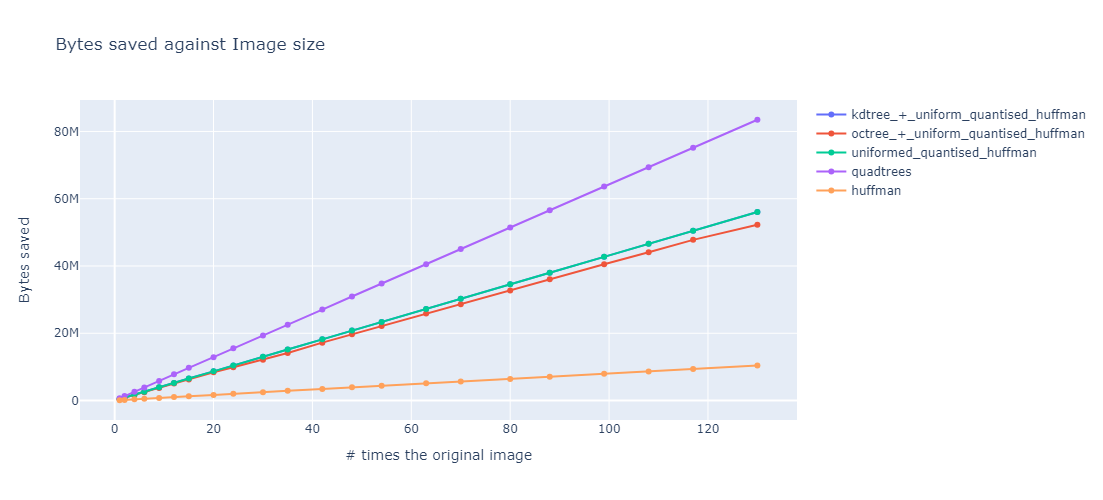

In [48]:
filter = {'huffman', 'uniformed_quantised_huffman', 'kdtree_+_uniform_quantised_huffman', 'quadtrees', 'octree_+_uniform_quantised_huffman'}
filtered_stats = dict()
# print(list(compressedTimes.keys()))
for item in filter:
    if item in compressedTimes.keys():
        filtered_stats[item] = copy.deepcopy(bytesSaved[item])
        
plot_image(pixel_counts, filtered_stats, "Bytes saved against Image size", "Bytes saved")

In [8]:
! pip freeze | grep kaleido

kaleido==0.1.0


['quadtrees', 'octree_+_uniform_quantised_huffman', 'kdtree_+_uniform_quantised_huffman', 'huffman', 'uniformed_quantised_huffman', 'adaptive_quantised_huffman']
{'kdtree_+_uniform_quantised_huffman': [614, 682, 1832, 2851, 4661, 6966, 8797, 8753, 10858, 14832, 20405, 22221, 22085, 26312, 33122, 39959, 43675, 53079, 52916, 65223, 67022, 81038], 'octree_+_uniform_quantised_huffman': [136, 151, 270, 440, 600, 1369, 1126, 1594, 1898, 2345, 2748, 3506, 4282, 4537, 9647, 8801, 7863, 12328, 11723, 14226, 13229, 14873], 'uniformed_quantised_huffman': [126, 139, 188, 277, 471, 694, 729, 974, 1735, 1945, 2530, 3460, 3926, 3542, 6031, 7614, 7166, 8149, 10278, 11619, 11384, 14915], 'quadtrees': [42, 8, 5, 6, 10, 15, 19, 37, 40, 58, 96, 53, 61, 68, 78, 88, 69, 102, 223, 174, 201, 216], 'huffman': [120, 122, 301, 291, 532, 927, 898, 1668, 2811, 2811, 3033, 3355, 4406, 5003, 10359, 11924, 6607, 20065, 16953, 19673, 19999, 17454]}


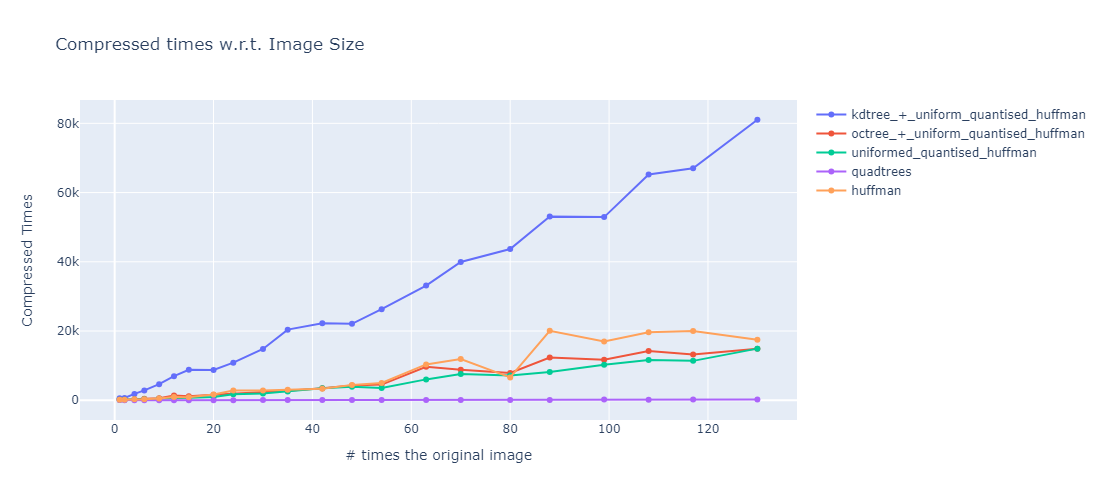

In [49]:
import copy
filter = {'huffman', 'uniformed_quantised_huffman', 'kdtree_+_uniform_quantised_huffman', 'quadtrees', 'octree_+_uniform_quantised_huffman'}
pixel_count_compressed_times = dict()
print(list(compressedTimes.keys()))
for item in filter:
    if item in compressedTimes.keys():
        pixel_count_compressed_times[item] = copy.deepcopy(compressedTimes[item])
print(pixel_count_compressed_times)
plot_image(pixel_counts, pixel_count_compressed_times, "Compressed times w.r.t. Image Size", "Compressed Times")

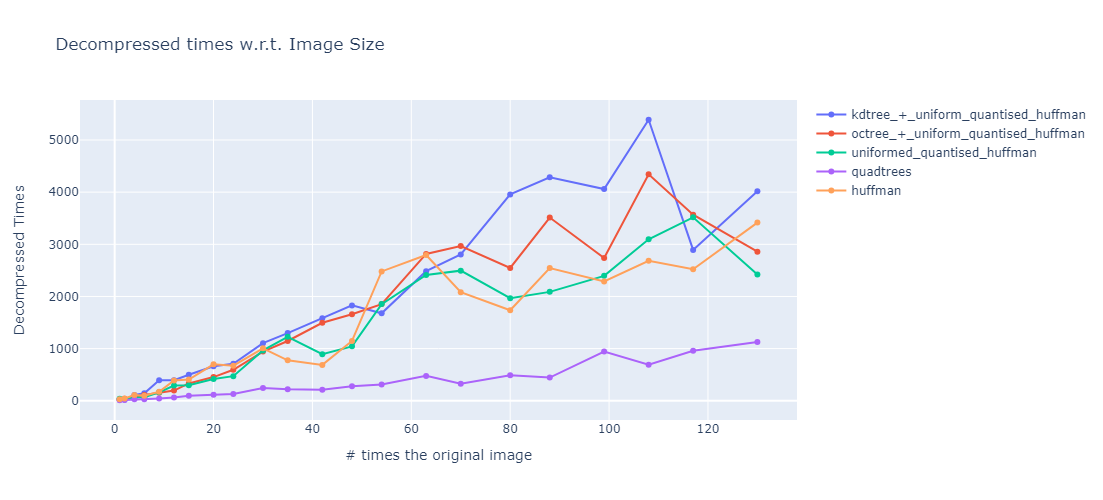

In [11]:
filter = {'huffman', 'uniformed_quantised_huffman', 'kdtree_+_uniform_quantised_huffman', 'quadtrees', 'octree_+_uniform_quantised_huffman'}
filtered_stats = dict()
# print(list(compressedTimes.keys()))
for item in filter:
    if item in compressedTimes.keys():
        filtered_stats[item] = copy.deepcopy(decompressTimes[item])
        
plot_image(pixel_counts, filtered_stats, "Decompressed times w.r.t. Image Size", "Decompressed Times")

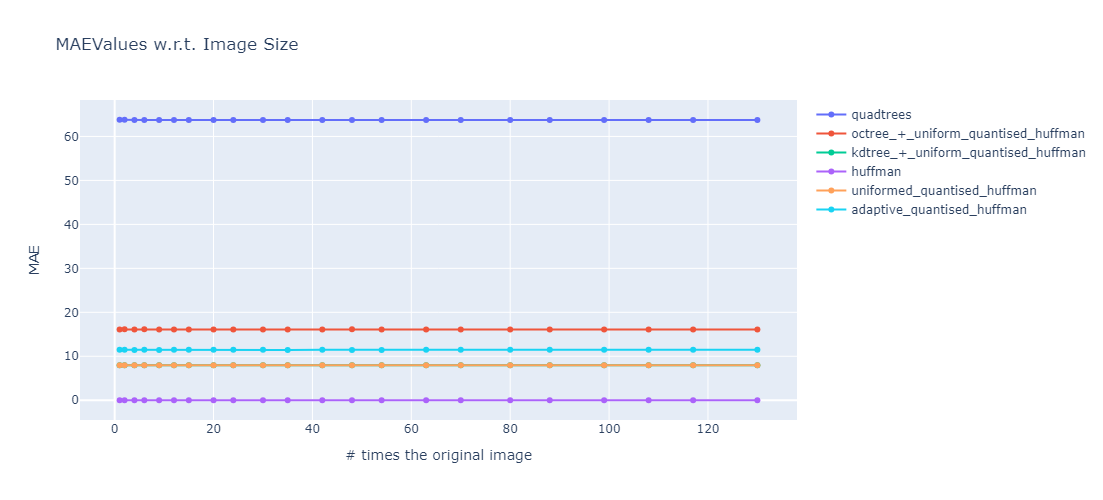

In [34]:
plot_image(pixel_counts, maeValues, "MAEValues w.r.t. Image Size", "MAE")

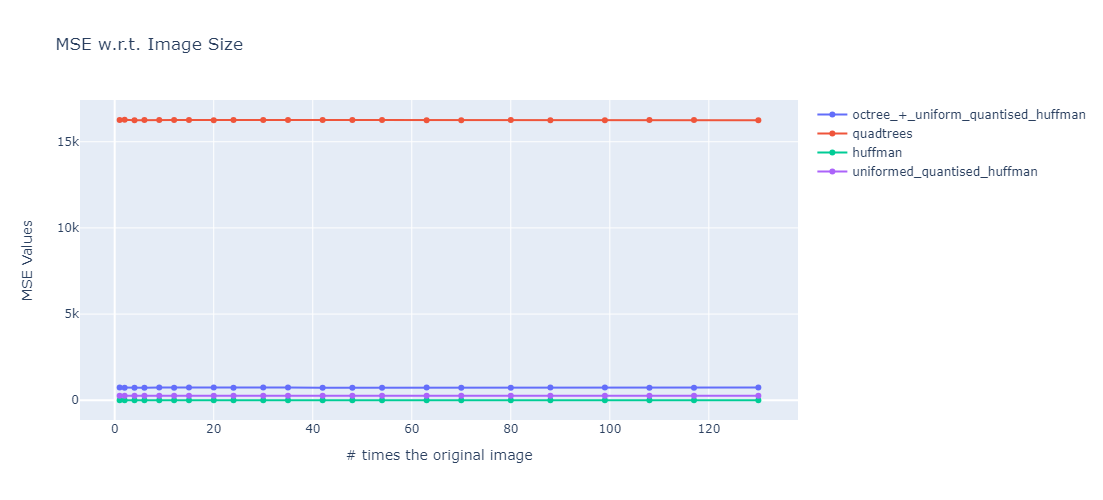

In [54]:
filter = {'huffman', 'uniformed_quantised_huffman', 'quadtrees', 'octree_+_uniform_quantised_huffman'}
filtered_stats = dict()
# print(list(compressedTimes.keys()))
for item in filter:
    if item in compressedTimes.keys():
        filtered_stats[item] = copy.deepcopy(mseValues[item])
plot_image(pixel_counts, filtered_stats, "MSE w.r.t. Image Size", "MSE Values")

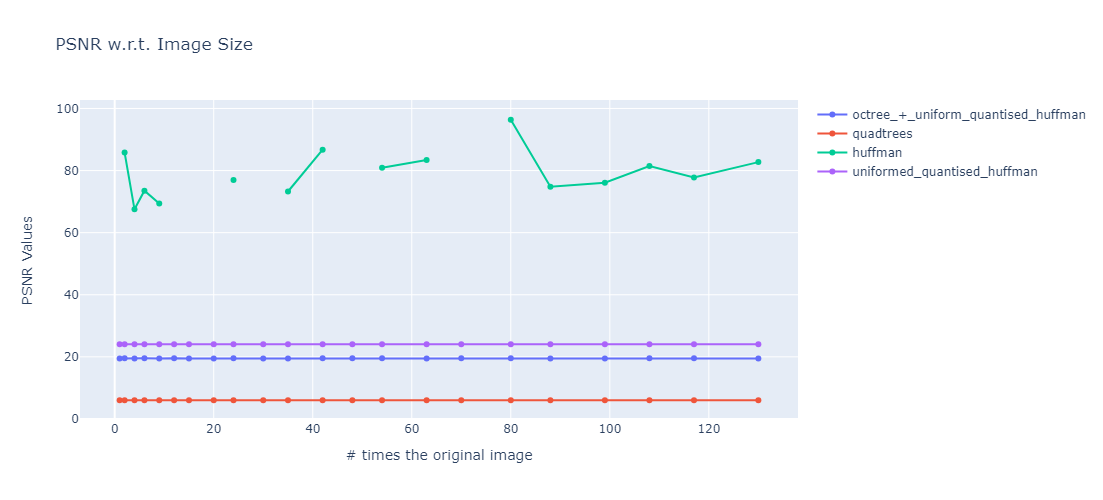

In [56]:
filter = {'huffman', 'uniformed_quantised_huffman', 'kdtree_+_uniform_quantised_huffman', 'quadtrees', 'octree_+_uniform_quantised_huffman'}
filtered_stats = dict()
# print(list(compressedTimes.keys()))
for item in filter:
    if item in compressedTimes.keys():
        filtered_stats[item] = copy.deepcopy(psnrValues[item])
plot_image(pixel_counts, filtered_stats, "PSNR w.r.t. Image Size", "PSNR Values")

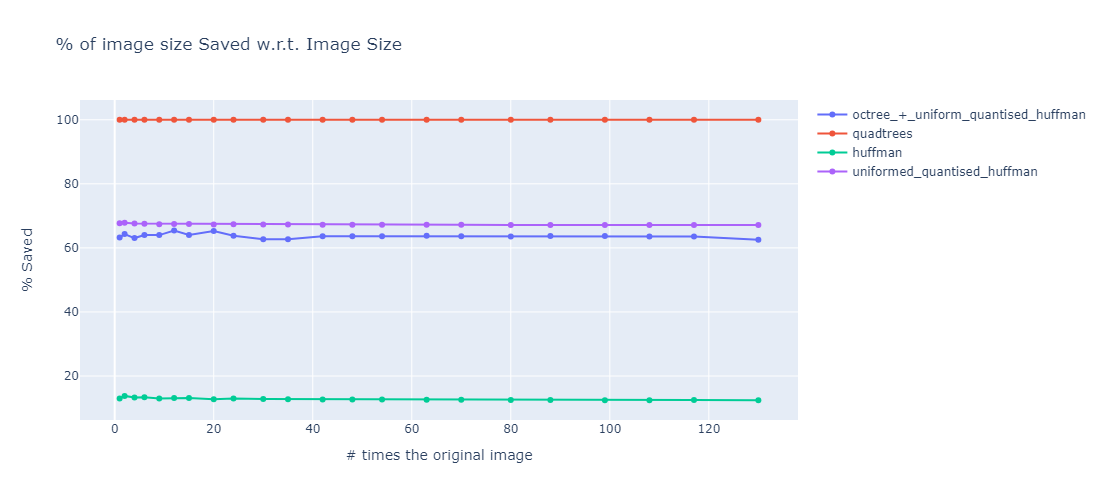

In [55]:
import copy
filter = {'huffman', 'uniformed_quantised_huffman', 'quadtrees', 'octree_+_uniform_quantised_huffman'}
percentSaved_filtered = dict()
for item in filter:
    if item in percentSaved.keys():
        percentSaved_filtered[item] = copy.deepcopy(percentSaved[item])
# print(pixel_count_compressed_times) 

plot_image(pixel_counts, percentSaved_filtered, "% of image size Saved w.r.t. Image Size", "% Saved")

In [15]:
def give_values_of_str_map(arr_str: str):
    # 187500=654967, 375000=1313331, 750000=2603679, 1125000=3903291...
    str = arr_str.strip()
    strArr = str.split(", ")
    return [int(x.split('=')[1]) for x in strArr]

In [16]:
print(give_values_of_str_map("187500=654967, 375000=1313331, 750000=2603679, 1125000=3903291, 1687500=5824503, 2250000=7778803, 2812500=9720619, 3750000=12899132, 4500000=15514508, 5625000=19350750, 6562500=22567725, 7875000=27048637, 9000000=30920786, 10125000=34772821, 11812500=40533313, 13125000=45031671, 15000000=51424297, 16500000=56564544, 18562500=63599488, 20250000=69382091, 21937500=75173251, 24375000=8348087"))

[654967, 1313331, 2603679, 3903291, 5824503, 7778803, 9720619, 12899132, 15514508, 19350750, 22567725, 27048637, 30920786, 34772821, 40533313, 45031671, 51424297, 56564544, 63599488, 69382091, 75173251, 8348087]


In [17]:
def give_values_of_str_float_map(arr_str: str):
    # 187500=654967, 375000=1313331, 750000=2603679, 1125000=3903291...
    str = arr_str.strip()
    strArr = str.split(", ")
    return [float(x.split('=')[1]) for x in strArr]

## Finding an optimal k

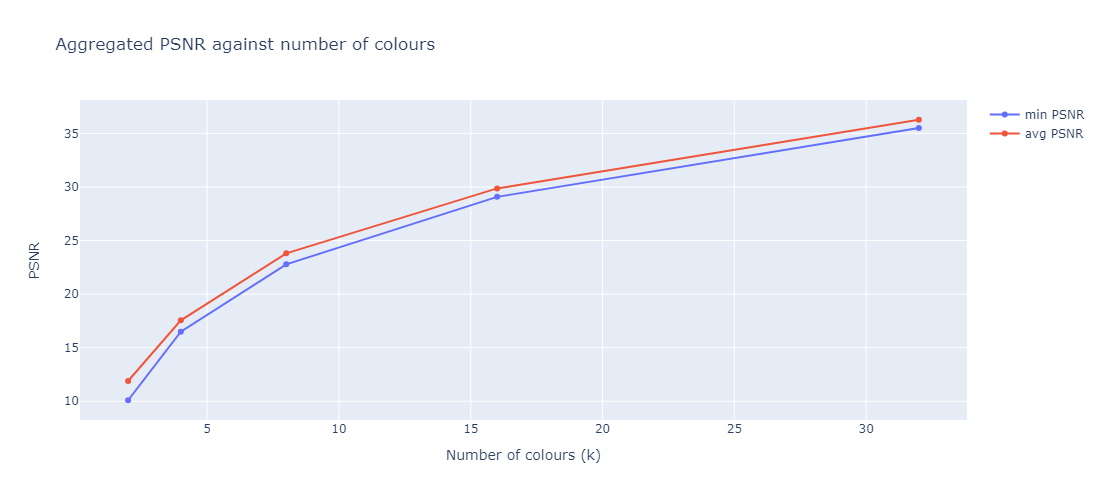

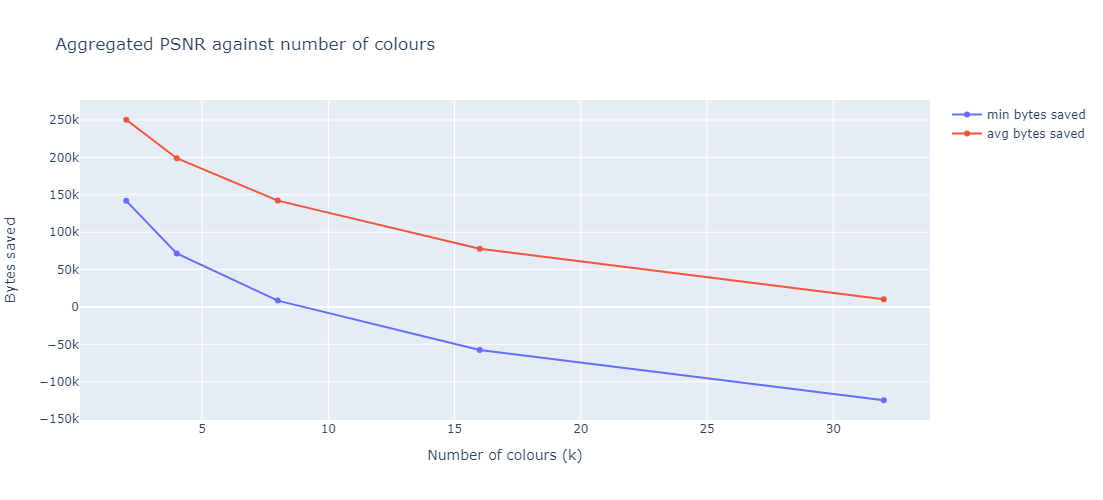

In [29]:
k = [
    2, 4, 8, 16, 32
]
min_psnr = [10.09, 16.49, 22.78, 29.08, 35.5]
avg_psnr = [11.89, 17.55, 23.81, 29.87, 36.28]

least_bytes_saved = [141935, 71563, 8503, -57566, -124780]
average_bytes_saved = [250375, 198977, 142231, 77777 , 10180.3]

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Scatter(x = k, y= min_psnr, name = 'min PSNR')
)
fig.add_trace(
    go.Scatter(x = k, y = avg_psnr, name = 'avg PSNR')
)
fig.update_layout(title = "Aggregated PSNR against number of colours", width = 700, height = 500)
fig.update_xaxes(title = "Number of colours (k)")
fig.update_yaxes(title = "PSNR")
fig.show()


fig = go.Figure()
fig.add_trace(
    go.Scatter(x = k, y= least_bytes_saved, name = 'min bytes saved')
)
fig.add_trace(
    go.Scatter(x = k, y = average_bytes_saved, name = 'avg bytes saved')
)
fig.update_layout(title = "Aggregated PSNR against number of colours", width = 700, height = 500)
fig.update_xaxes(title = "Number of colours (k)")
fig.update_yaxes(title = "Bytes saved")
fig.show()